**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

### Разбираюсь с градиентным спуском подробнее
Рассмотрим функцию одной переменной, попытаемся построить для нее простейший алгоритм градиентного спуска
В общем ключевая фишка, которую я вначеле не уловил, была в том, что нужно считать grd = f(xs+dx) - y1, т.е. градиент всегда считать по + координате. Вообще в нормальных алгоритмов dx должен быть адаптивным наверно, но то такое, детали.

In [1]:
import numpy as np

def sqx(x):
    return x**2

def gradsolv(start_point,f):
    #f - function for optimization
    n1 = 0
    dx = 0.05
    delta = 0.1
    grd = (f(start_point+dx) - f(start_point))    
    xs = start_point
    y0 = f(xs)
    xs = start_point
    while n1 < 300:        
        xs = xs - delta*grd
        y1 = f(xs)
        grd = f(xs+dx) - y1
        n1 += 1
        y0 = y1
        if np.abs(grd) < 0.001:
            break
            
    print(grd)
    print(n1)
    return y0, xs
a,b = gradsolv(1,sqx)
print(a,b)


0.005026691642306796
300
0.0006384170655303015 0.025266916423067963


### Теперь попробуем такую штуку провести с функцией 2х переменных
Стохастический спуск это, видимо, когда мы на каждом шаге не весь градиент вычисляем, а только одну из компонент. Ну давайте и так попробуем

In [2]:
import numpy as np
import random

def sqx(r):
    return (r[0]+11)**2 + (r[1]+5)**2

def gradsolv(sp,f):
    #f - function for optimization
    #sp - start_point
    n1 = 0
    dx = 0.05
    delta = 0.1
    
    xs = sp[0]
    ys = sp[1]
    
    y0 = f([xs,ys])
    
    grdx = f([xs+dx,ys]) - y0
    grdy = f([xs,ys+dx]) - y0    
    while n1 < 1000:
        bl = random.getrandbits(1)
        if bl == 0:
            grdx = f([xs+dx,ys]) - y0
            xs = xs - delta*grdx
            y1 = f([xs,ys])            
            grdy = 0
        else:
            grdy = f([xs,ys+dx]) - y0
            ys = ys - delta*grdy
            y1 = f([xs,ys])
            grdx = 0            
        n1 += 1
        y0 = y1
        grd = np.abs(np.sqrt(grdx**2+grdy**2))
        if  grd < 0.001:
            break
            
    print(grd)
    print(n1)
    return y0, [xs,ys]
a,b = gradsolv([1,1],sqx)
print(a)
print(b)

0.004290153123566959
1000
0.0026713852907897994
[-10.951357462256793, -4.982527484076686]


## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [3]:
import pandas as pd
adver_data = pd.read_csv('C:/MatkivskiyV/study/2course/week1/advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [4]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
X = adver_data.loc[:,['TV','Radio','Newspaper']].to_numpy()
X.shape

(200, 3)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

Использовал метод to_numpy вместо values т.к. это рекомендует актуальная документация по Pandas

In [6]:
np.set_printoptions(precision=2) #Чтобы не было много знаков после запятой

X = adver_data.loc[:,['TV','Radio','Newspaper']].to_numpy()
y = adver_data.loc[:,['Sales']].to_numpy()
print(X[0:3,:],'\n\n',y[0:3])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]] 

 [[22.1]
 [10.4]
 [ 9.3]]


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [7]:
means, stds = X.mean(axis=0),X.std(axis=0)

print('Среднее и отклонение до масштабирования:')
print(means,'\n',stds,'\n')

X = (X - means)/stds
meanst, stdst = X.mean(axis=0),X.std(axis=0)

print('После:')
print(meanst,'\n',stdst)
#X -= X.mean(axis=0)
#X /= X.std(axis=0)
del(meanst,stdst)

Среднее и отклонение до масштабирования:
[147.04  23.26  30.55] 
 [85.64 14.81 21.72] 

После:
[ 1.22e-16 -4.53e-16  2.22e-16] 
 [1. 1. 1.]


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
import numpy as np
X = np.hstack((X,np.ones((200,1)))) # Ваш код здесь
X[0:4]

array([[ 0.97,  0.98,  1.78,  1.  ],
       [-1.2 ,  1.08,  0.67,  1.  ],
       [-1.52,  1.53,  1.78,  1.  ],
       [ 0.05,  1.22,  1.29,  1.  ]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [9]:
def mserror(y, y_pred):
    error = y-y_pred    
    return (error**2).sum()/error.shape[0]

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [10]:
answer1 = mserror(y,np.median(y)) #проверить эту фигню
print(round(answer1, 3))

28.346


In [11]:
with open("c:/MatkivskiyV/study/2course/week1/2w1_2_task1.txt", "w") as first:
    first.write('{:.3f}'.format(answer1))


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [12]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y  # Ваш код здесь

In [13]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.92]
 [ 2.79]
 [-0.02]
 [14.02]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

Фраза "нулевых значениях масштабированных признаков" - вообще непонятная. Это значит нулевые среднее и дисперсия? Но это тогда просто нули и все. Или я неправильно понял, что они имели ввиду

In [14]:
wt = np.array([0, 0, 0])
wt = wt[np.newaxis,:]
answer2 = wt @ norm_eq_weights[0:3] + norm_eq_weights[3]
print(round(answer2[0,0], 3))
with open("c:/MatkivskiyV/study/2course/week1/2w1_2_task2.txt", "w") as first:
    first.write('{:.3f}'.format(round(answer2[0,0], 3)))

14.022


In [15]:
norm_eq_weights[0:3].shape

(3, 1)

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [16]:
def linear_prediction(X, w):
    return X @ w

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [17]:
t1 = linear_prediction(X,norm_eq_weights)
answer3 = mserror(y,t1)
print(round(answer3, 3))
with open("c:/MatkivskiyV/study/2course/week1/2w1_2_task3.txt", "w") as first:
    first.write('{:.3f}'.format(round(answer3, 3)))

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [200]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    # train_ind - индекс, по которому вычисляется градиент
    grad = (X[train_ind,:] @ w - y[train_ind]) * X[train_ind,:]  #calculating the gradient analytically
    #grad = (X @ w - y).T @ X - full calculated grad    
    return  w - eta * grad/y.shape[0]*2

def stochastic_gradient_step_fix(X, y, w, train_ind, eta=0.01):
    #In the function, the grad is culculation with a fixed number of variables
    subprod = X[train_ind,0] * w[0] + X[train_ind,1] * w[1] + X[train_ind,2] * w[2] + X[train_ind,3] * w[3] - y[train_ind]     
    grad0 = subprod * X[train_ind,0] 
    grad1 = subprod * X[train_ind,1]
    grad2 = subprod * X[train_ind,2]
    grad3 = subprod * X[train_ind,3]
    return  w - eta * np.array([grad0, grad1, grad2, grad3]).reshape(4)/y.shape[0]*2
    

In [180]:
w = np.array([0.,0.,4.,0.])
train_ind = 100
subprod = X[train_ind,0] * w[0] + X[train_ind,1] * w[1] + X[train_ind,2] * w[2] + X[train_ind,3] * w[3] - y[train_ind]
print(subprod)

grad0 = subprod * X[train_ind,0] 
grad1 = subprod * X[train_ind,1]
grad2 = subprod * X[train_ind,2]
grad3 = subprod * X[train_ind,3]
print(np.array([grad0, grad1, grad2, grad3]).reshape(4))
print( (X[train_ind,:] @ w - y[train_ind]) * X[train_ind,:] )

[-8.16]
[-7.18 10.44 -7.23 -8.16]
[-7.18 10.44 -7.23 -8.16]


In [181]:
print(stochastic_gradient_step_fix(X, y, w, train_ind, eta=0.01))
print(stochastic_gradient_step(X, y, w, train_ind, eta=0.01))

[ 3.59e-04 -5.22e-04  4.00e+00  4.08e-04]
[ 3.59e-04 -5.22e-04  4.00e+00  4.08e-04]


**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [201]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    eta=0.01
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        wn = stochastic_gradient_step(X, y, w, random_ind, eta)
        dwn = wn - w
        #weight_dist = ( (dwn @ dwn.T).sum()/len(dwn) )
        weight_dist = np.linalg.norm(w - wn)
        w = wn
        
        #Вычислил ошибку по одному а не по всей матрице
        #По всей же относительно долго вычислять.
        #errors.append(  ((X @ wn).T - y[:,0]).std()  )        
        errors.append(  np.abs( X[random_ind,:] @ wn - y[random_ind,0] ) ) 
               
        iter_num += 1
    print(iter_num)
    print(weight_dist)
    print(w.shape)
        
    return w, errors

In [104]:
wn = np.array([1.,1.,1.,1.])
errors = []
X[123,:] @ wn - - y[123,0]
errors.append(  X[123,:] @ wn - y[:,0] ) 


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [202]:
%%time
w_init = np.array([0.,0.,0.,0.])
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, max_iter=1e5, 
                                                                            min_weight_dist=1e-8)

84501
5.0536343368235184e-09
(4,)
Wall time: 5.26 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

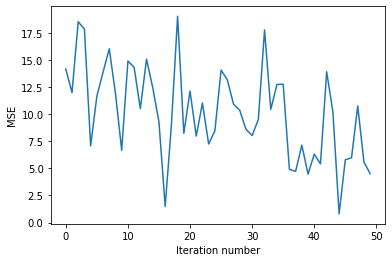

In [48]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

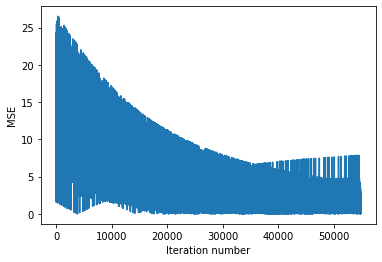

In [192]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [ ]:
list( map(lambda z: print('{:.4f}'.format(z)) , stoch_grad_desc_weights) )

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [203]:
answer4 = mserror(y[:,0],X @ stoch_grad_desc_weights) # Ваш код здесь
print(round(answer4, 3))
with open("c:/MatkivskiyV/study/2course/week1/2w1_2_task4.txt", "w") as first:
    first.write('{:.3f}'.format(round(answer4, 3)))

2.784
